In [2]:
import pandas as pd
from tagger import Tagger, ProcessData, Evaluations

train = pd.read_csv('../data/train_valid_all.csv')
train.shape

OPENAI API KEY OBTAINED


(678, 10)

In [2]:
evals = Evaluations()
evals.evaluate(train, loss_type="accuracy")

42.772861356932154

In [3]:
num_correct_predictions = (train["Label"] == train["Prediction"]).sum()
num_correct_predictions

290

In [9]:
bottom_half = pd.read_csv('../data/train_valid_1_and_2.csv')
top_half = pd.read_csv('../data/train_valid_3_4_5.csv')
print(bottom_half.shape)
print(top_half.shape)

(549, 10)
(129, 10)


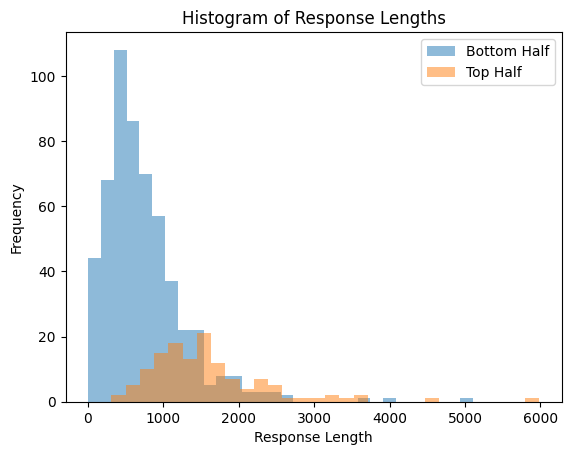

In [10]:
import matplotlib.pyplot as plt

# Calculate the lengths of responses
bottom_half_lengths = bottom_half["Response"].str.len()
top_half_lengths = top_half["Response"].str.len()

# Calculate the average length of responses
bottom_half_avg_length = bottom_half_lengths.mean()
top_half_avg_length = top_half_lengths.mean()

# Plot histograms
plt.hist(bottom_half_lengths, bins=30, alpha=0.5, label='Bottom Half')
plt.hist(top_half_lengths, bins=30, alpha=0.5, label='Top Half')

# Add labels and title
plt.xlabel('Response Length')
plt.ylabel('Frequency')
plt.title('Histogram of Response Lengths')
plt.legend()

# Show plot
plt.show()


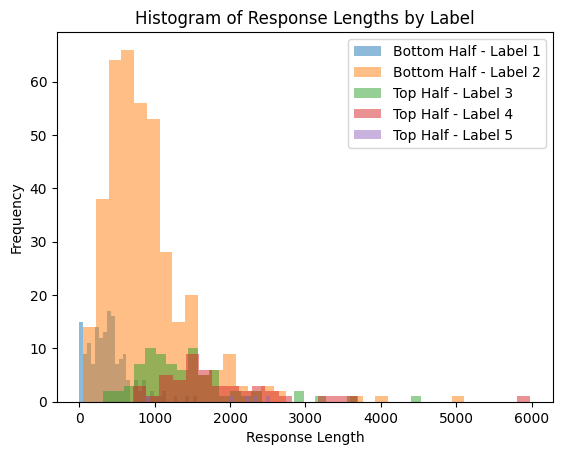

In [18]:
import matplotlib.pyplot as plt

# Split by the "Label" value inside both bottom_half and top_half dataframes
bottom_labels = [1, 2]
top_labels = [3, 4, 5]

# Plot the distribution for all labels
for label in bottom_labels:
    bottom_half_label = bottom_half[bottom_half["Label"] == label]
    bottom_half_lengths = bottom_half_label["Response"].str.len()
    plt.hist(bottom_half_lengths, bins=30, alpha=0.5, label=f'Bottom Half - Label {label}')
    
    
for label in top_labels:
    top_half_label = top_half[top_half["Label"] == label]
    top_half_lengths = top_half_label["Response"].str.len()
    
    plt.hist(top_half_lengths, bins=30, alpha=0.5, label=f'Top Half - Label {label}')

# Add labels and title
plt.xlabel('Response Length')
plt.ylabel('Frequency')
plt.title('Histogram of Response Lengths by Label')
plt.legend()

# Show plot
plt.show()


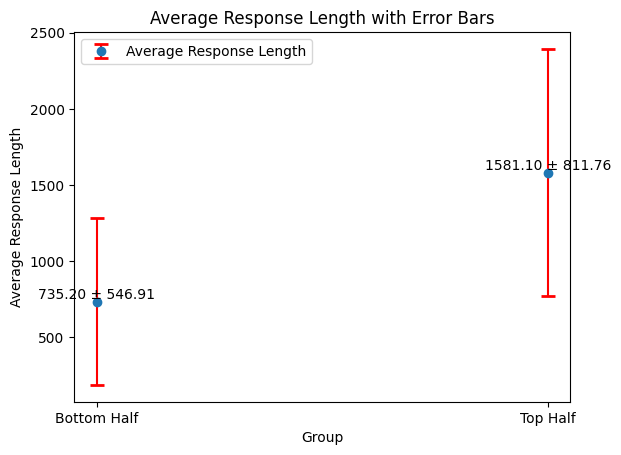

In [13]:
import numpy as np

# Calculate the standard deviations of response lengths
bottom_half_std_length = bottom_half_lengths.std()
top_half_std_length = top_half_lengths.std()

# Plot the averages with error bars
plt.errorbar(['Bottom Half', 'Top Half'], 
             [bottom_half_avg_length, top_half_avg_length], 
             yerr=[bottom_half_std_length, top_half_std_length], 
             fmt='o', capsize=5, capthick=2, ecolor='red', label='Average Response Length')

# Add labels and title
plt.xlabel('Group')
plt.ylabel('Average Response Length')
plt.title('Average Response Length with Error Bars')
plt.legend()

# Label with the values
for i, (avg, std) in enumerate(zip([bottom_half_avg_length, top_half_avg_length], 
                                   [bottom_half_std_length, top_half_std_length])):
    plt.text(i, avg, f'{avg:.2f} ± {std:.2f}', ha='center', va='bottom')

# Show plot
plt.show()


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

df = pd.read_csv('../data/train_valid_all.csv')
X = df['Response'].str.len().values.reshape(-1, 1)  
y = df['Label']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000)  # Increase the number of iterations
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy of predicting label based on response length: {accuracy:.2f}')


Accuracy of predicting label based on response length: 0.62


In [8]:
# Stitch together y_test and y_pred
import pandas as pd

# Create a DataFrame to hold the actual and predicted values
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Display the first few rows of the DataFrame
print(results_df.head(20))


     Actual  Predicted
646       2   2.177793
336       1   1.466989
63        2   2.126353
367       3   2.453029
101       2   1.509076
344       2   3.097028
259       1   1.800345
164       1   1.710827
595       1   1.592582
382       2   2.072241
311       2   1.881847
399       2   2.271987
527       2   1.730200
598       1   1.452960
131       2   2.145058
634       2   1.666067
208       1   1.519097
55        2   1.787652
209       2   1.897880
444       3   2.129025
